
<u>**Understand the quantization process**

In [1]:
import numpy as np

def quantize_8bits(float_data):
    # Calculate the range of the data
    data_min = np.min(float_data)
    data_max = np.max(float_data)
    
    # Calculate the scale and zero-point
    scale = (data_max - data_min) / 255
    zero_point = data_min
    
    # Quantize the data
    quantized_data = np.round((float_data - zero_point) / scale).astype(np.uint8)
    return quantized_data, zero_point, scale

def quantize_signed_8bits(float_data):
    # Calculate the range of the data
    data_min = -np.max(np.abs(float_data))
    data_max = np.max(np.abs(float_data))

    # Calculate the scale and zero-point
    scale = (data_max - data_min) / 255
    zero_point = data_min + 128 * scale
    
    # Quantize the data
    quantized_data = np.round((float_data - zero_point) / scale).astype(np.int8)
    return quantized_data, zero_point, scale

def dequantize_data(quantized_data, zero_point, scale):
    # Dequantize the data to get back to the original scale
    return np.around(quantized_data * scale + zero_point, decimals=4)
    
# Generate random values between -1 and 1
np.random.seed(42)
random_array = np.around(np.sort(np.random.uniform(-1, 1, 9)), decimals=4)

# Print the results
print("Original data:         ", random_array)

# Quantize asym
quantized_asym_data, zero_point, scale = quantize_8bits(random_array)
dequantize_asym_data = dequantize_data(quantized_asym_data, zero_point, scale)
print("Quantized asym data:   ", quantized_asym_data)
print("Dequantized asym data: ", dequantize_asym_data)

# Quantize sym
quantized_sym_data, zero_point, scale = quantize_signed_8bits(random_array)
dequantize_sym_data = dequantize_data(quantized_sym_data, zero_point, scale)
print("Quantized sym data:    ", quantized_sym_data)
print("Dequantized sym data:  ", dequantize_sym_data)

Original data:          [-0.8838 -0.688  -0.688  -0.2509  0.1973  0.2022  0.464   0.7324  0.9014]
Quantized asym data:    [  0  28  28  90 154 155 193 231 255]
Dequantized asym data:  [-0.8838 -0.6878 -0.6878 -0.2537  0.1943  0.2013  0.4674  0.7334  0.9014]
Quantized sym data:     [-126  -98  -98  -36   27   28   65  103  127]
Dequantized sym data:   [-0.8873 -0.6893 -0.6893 -0.251   0.1944  0.2015  0.4631  0.7317  0.9014]


<u>**Understand the shape of a tensor**

In [2]:
import numpy as np

In [3]:
#create a numpy array with a shape of 1x5x10
array = np.random.rand(1, 3, 5)
print(array)

[[[0.70807258 0.02058449 0.96990985 0.83244264 0.21233911]
  [0.18182497 0.18340451 0.30424224 0.52475643 0.43194502]
  [0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]]]


In [4]:
#print the shape of the array
print(np.shape(array))

(1, 3, 5)


In [5]:
#transpose the array
array_transposed = np.transpose(array)
print(array_transposed)

[[[0.70807258]
  [0.18182497]
  [0.29122914]]

 [[0.02058449]
  [0.18340451]
  [0.61185289]]

 [[0.96990985]
  [0.30424224]
  [0.13949386]]

 [[0.83244264]
  [0.52475643]
  [0.29214465]]

 [[0.21233911]
  [0.43194502]
  [0.36636184]]]


In [6]:
#print the shape of the transposed array
print(np.shape(array_transposed))

(5, 3, 1)


<u>**Understand the preprocessing input tensors constraints**

In [7]:
from PIL import Image
from IPython.display import display
import numpy as np

In [8]:
# Load the image
img = Image.open('pingpong_balls.png')

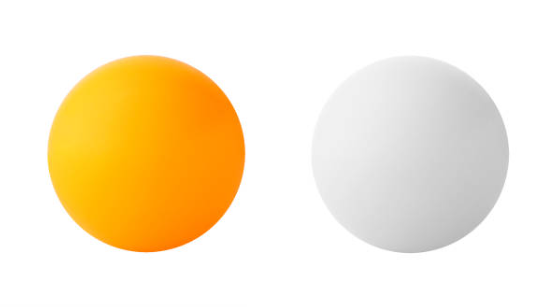

In [9]:
# Display the image
display(img)

In [10]:
# Print the size of the image
print(f"Image size: {img.size}")  # Output will be in the format (width, height)

Image size: (555, 307)


In [11]:
# Convert the image to a NumPy array
img_array = np.array(img)

# Print the shape of the image
print(f"Image shape: {img_array.shape}")  # Output will be (224, 224, 3) for an RGB image

Image shape: (307, 555, 4)


In [12]:
# Imagine a NN model with a 224x224 input size
# Resize the image to 224x224 pixels without keeping the aspect ratio
resized_img_stretch = img.resize((224, 224))

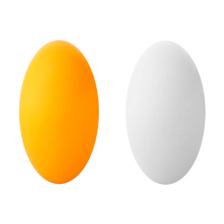

In [13]:
# Display the resized_img_stretch
display(resized_img_stretch)

In [14]:
# Imagine a NN model with a 224x224 input size
# Resize the image to 224x224 pixels and keep the aspect ratio
left = 555/4
top = 0
right = left + 307
bottom = 307
img_crop = img.crop((left, top, right, bottom))
resized_img_keep_ratio = img_crop.resize((224, 224))

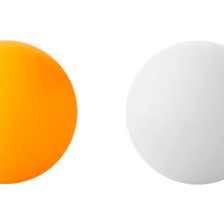

In [15]:
# Display the resized_img_keep_ratio
display(resized_img_keep_ratio)

In [16]:
# Convert the image to a NumPy array
img_array = np.array(resized_img_keep_ratio)

# Print the shape of the image
print(f"Image shape: {img_array.shape}")  # Output will be (224, 224, 3) for an RGB image

Image shape: (224, 224, 4)


In [17]:
# Imagine that the input shape of the NN model is (224,224,3)
# Remove the alpha channel
img_array = img_array[:, :, :3]

# Convert the NumPy array back to a PIL image
img_no_alpha = Image.fromarray(img_array)

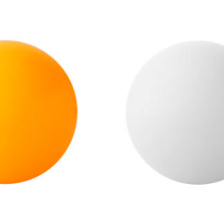

In [18]:
# Display the resized_img_stretch
display(img_no_alpha)

In [19]:
# Display the image with R and B component inverted
img_array = img_array[:, :, [2, 1, 0]]

# Convert the NumPy array back to a PIL image
img_BGR = Image.fromarray(img_array)

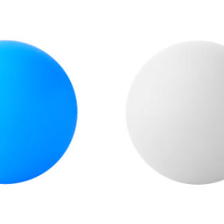

In [20]:
# Display the image with R and B component inverted
display(img_BGR)

In [21]:
# Print one pixel of the picture
print(img_array[110][0])

[  1 176 255]


In [23]:
# Imagine that the input shape of the NN model has a float format expected [-1, 1]
# The RGB picture need to be converted into float and normalized using the mean and the standart deviation
# calculated from the trained dataset and generaly provided with NN information.
mean = 127.5
std_dev = 127.5
# Remove the alpha channel
normalized_img_array = (img_array - mean) / std_dev

In [24]:
# Print same pixel of the picture but normalized
print(normalized_img_array[110][0])

[-0.99215686  0.38039216  1.        ]


<u>**Understand the postprocessing with output tensor organization (example of the yolov8 object detection single class)**

In [26]:
import numpy as np

np.random.seed(57)

# Assuming output is the tensor with shape (7, 5)
# 7 is the number of possible simultaneous detection
# 5 is composed of [0..3] the box coordinate x0/y0, x1/y1 [5] the confidence level of the unique class 
output = np.random.rand(7, 5)
print(output)

[[0.08734964 0.2304771  0.41106107 0.3107827  0.56595589]
 [0.5450637  0.80709944 0.91815511 0.52209075 0.42468726]
 [0.07180395 0.89852885 0.42051383 0.58216979 0.21415354]
 [0.44748568 0.4678638  0.10063716 0.92728789 0.16098684]
 [0.87459418 0.05216006 0.99227957 0.10514732 0.40198985]
 [0.07183655 0.01919304 0.72131415 0.04146587 0.01865054]
 [0.08293774 0.28090455 0.42914171 0.01973034 0.4616679 ]]


In [27]:
# Step 1: Extract the confidence levels
confidence_level = output[:, 4:]  # Shape: (7, 1)
print(confidence_level)

[[0.56595589]
 [0.42468726]
 [0.21415354]
 [0.16098684]
 [0.40198985]
 [0.01865054]
 [0.4616679 ]]


In [30]:
# Define the confidence threshold to filter the output
confidence_threshold = 0.4
# Get the indices of the detections that have a confidence obove the threshold
indices = np.where(confidence_level > confidence_threshold)[0]
print(indices)

[0 1 4 6]


In [31]:
# Filter the relevant detection based on the obove indices
filtered_outputs = output[indices]
print(filtered_outputs)

[[0.08734964 0.2304771  0.41106107 0.3107827  0.56595589]
 [0.5450637  0.80709944 0.91815511 0.52209075 0.42468726]
 [0.87459418 0.05216006 0.99227957 0.10514732 0.40198985]
 [0.08293774 0.28090455 0.42914171 0.01973034 0.4616679 ]]


<u>**Understand the postprocessing wiht output tensor organization (example of the yolov8 object detection multiple classes)**

In [33]:
import numpy as np

np.random.seed(30)

# Assuming output is the tensor with shape (7, 10)
# 7 is the number of possible simultaneous detection
# 10 is composed of [0..3] the box coordinate x0/y0, x1/y1 [4..9] the confidence level of the possible classes (6 classes)
output = np.random.rand(7, 10)
print(output)

[[0.64414354 0.38074849 0.66304791 0.16365073 0.96260781 0.34666184
  0.99175099 0.2350579  0.58569427 0.4066901 ]
 [0.13623432 0.54413629 0.51817635 0.76685511 0.93385014 0.08970338
  0.19577126 0.99419368 0.2351805  0.23898637]
 [0.62909983 0.73495258 0.68834438 0.03113075 0.90251384 0.28643533
  0.55561256 0.37642024 0.02662436 0.49414912]
 [0.83471509 0.36698733 0.51538211 0.47237913 0.38615209 0.744137
  0.33524208 0.59543829 0.31613338 0.34625042]
 [0.24483181 0.69795016 0.21208083 0.26729317 0.37389408 0.57308851
  0.91735808 0.81897594 0.16318089 0.02415477]
 [0.78465363 0.26485738 0.33936706 0.81436959 0.80745472 0.49356164
  0.84531244 0.36518998 0.0478309  0.26414579]
 [0.46386716 0.69335506 0.31343675 0.46253679 0.81968765 0.68449103
  0.32403382 0.576812   0.63264998 0.59646167]]


In [34]:
# Step 1: Extract the class confidence levels
class_confidences = output[:, 4:]  # Shape: (7, 6)
print(class_confidences)

[[0.96260781 0.34666184 0.99175099 0.2350579  0.58569427 0.4066901 ]
 [0.93385014 0.08970338 0.19577126 0.99419368 0.2351805  0.23898637]
 [0.90251384 0.28643533 0.55561256 0.37642024 0.02662436 0.49414912]
 [0.38615209 0.744137   0.33524208 0.59543829 0.31613338 0.34625042]
 [0.37389408 0.57308851 0.91735808 0.81897594 0.16318089 0.02415477]
 [0.80745472 0.49356164 0.84531244 0.36518998 0.0478309  0.26414579]
 [0.81968765 0.68449103 0.32403382 0.576812   0.63264998 0.59646167]]


In [35]:
# Step 2: Find the maximum confidence and its corresponding class
max_confidences = np.max(class_confidences, axis=1)
class_indices = np.argmax(class_confidences, axis=1)
print(max_confidences)
print(class_indices)

[0.99175099 0.99419368 0.90251384 0.744137   0.91735808 0.84531244
 0.81968765]
[2 3 0 1 2 2 0]


In [36]:
# Define the confidence threshold to filter the output
confidence_threshold = 0.9
# Get the indices of the detections that have a confidence obove the threshold
indices = np.where(max_confidences > confidence_threshold)[0]
print(indices)

[0 1 2 4]


In [37]:
# Filter the relevant detection based on the obove indices
filtered_outputs = output[indices]
print(filtered_outputs)

[[0.64414354 0.38074849 0.66304791 0.16365073 0.96260781 0.34666184
  0.99175099 0.2350579  0.58569427 0.4066901 ]
 [0.13623432 0.54413629 0.51817635 0.76685511 0.93385014 0.08970338
  0.19577126 0.99419368 0.2351805  0.23898637]
 [0.62909983 0.73495258 0.68834438 0.03113075 0.90251384 0.28643533
  0.55561256 0.37642024 0.02662436 0.49414912]
 [0.24483181 0.69795016 0.21208083 0.26729317 0.37389408 0.57308851
  0.91735808 0.81897594 0.16318089 0.02415477]]


In [38]:
# Get the id of the classes detected
filtered_class_id = class_indices[indices]
print(filtered_class_id)

[2 3 0 2]


<u>**Play with gstreamer pipeline** 

In [39]:
!gst-launch-1.0 libcamerasrc name=cs src::stream-role=view-finder src_0::stream-role=still-capture cs.src ! queue ! video/x-raw,width=640,height=480,format=RGB16 ! waylandsink cs.src_0 ! queue ! video/x-raw,width=256,height=256,format=RGB ! videoconvert ! waylandsink

Setting pipeline to PAUSED ...
[1:54:11.202728375] [12851]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+stm32mp-r7-dirty (2025-06-23T13:56:22+00:00)
[1:54:11.244124650] [12858]  WARN CameraSensor camera_sensor.cpp:259 'imx335 0-001a': Recommended V4L2 control 0x009a0922 not supported
[1:54:11.244231975] [12858]  WARN CameraSensor camera_sensor.cpp:331 'imx335 0-001a': The sensor kernel driver needs to be fixed
[1:54:11.244271250] [12858]  WARN CameraSensor camera_sensor.cpp:333 'imx335 0-001a': See Documentation/sensor_driver_requirements.rst in the libcamera sources for more information
[1:54:11.245447800] [12858]  WARN CameraSensor camera_sensor.cpp:479 'imx335 0-001a': Failed to retrieve the camera location
[1:54:11.245506800] [12858]  WARN CameraSensor camera_sensor.cpp:501 'imx335 0-001a': Rotation control not available, default to 0 degrees
Pipeline is live and does not need PREROLL ...
Pipeline is PREROLLED ...
Setting pipeline to PLAYING ...
New clock: GstSystemClock
[1

In [40]:
!gst-launch-1.0 libcamerasrc name=cs src::stream-role=view-finder src_0::stream-role=still-capture cs.src ! queue ! video/x-raw,width=640,height=480,format=RGB16 ! gtkwaylandsink cs.src_0 ! queue ! video/x-raw,width=256,height=256,format=RGB ! videoconvert ! gtkwaylandsink

Setting pipeline to PAUSED ...
[1:54:22.919766800] [12881]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+stm32mp-r7-dirty (2025-06-23T13:56:22+00:00)
[1:54:22.959810450] [12888]  WARN CameraSensor camera_sensor.cpp:259 'imx335 0-001a': Recommended V4L2 control 0x009a0922 not supported
[1:54:22.959915325] [12888]  WARN CameraSensor camera_sensor.cpp:331 'imx335 0-001a': The sensor kernel driver needs to be fixed
[1:54:22.959958025] [12888]  WARN CameraSensor camera_sensor.cpp:333 'imx335 0-001a': See Documentation/sensor_driver_requirements.rst in the libcamera sources for more information
[1:54:22.961580425] [12888]  WARN CameraSensor camera_sensor.cpp:479 'imx335 0-001a': Failed to retrieve the camera location
[1:54:22.961650950] [12888]  WARN CameraSensor camera_sensor.cpp:501 'imx335 0-001a': Rotation control not available, default to 0 degrees
Pipeline is live and does not need PREROLL ...
[1:54:23.144335050] [12892]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x